[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module3_Files/Save_MNIST_to_Drive_and_Model.ipynb)

In [ ]:
import keras
keras.__version__

'2.8.0'

# Saving MNIST data as IMAGES to your Drive... then modeling!
-----------------------

**Dr. Dave Wanik - University of Connecticut**

Let's try to save the data for modeling as IMAGES instead of reading the files as numpy arrays. It's more work, but I look reading the data from disk and converting (since this is what you will do in the real-world).

Much of the code from cats and dogs is able to be used in this script - just be careful of the model architecture, the arguments to the model.compile(loss='categorical_crossentropy') and to the data generator. Also note that even though these are BW images, the generator still reads images as 3 channel RGB.

Useful reading:
* http://yann.lecun.com/exdb/mnist/
* https://chromium.googlesource.com/external/github.com/tensorflow/tensorflow/+/r0.7/tensorflow/g3doc/tutorials/mnist/download/index.md

In [ ]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The MNIST dataset comes pre-loaded in Keras, in the form of a set of Numpy arrays:

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Look at one image...
Just to get a feel for the data.

In [ ]:
# look at one image
import pandas as pd
import numpy as np
import sys

# subset first 'image'
x = train_images[0]
# convert to pandas dataframe for easy viewing...
x = pd.DataFrame(x)
print(x.shape) # 28 rows and 28 columns
# you can confirm
print(train_labels[0])
x # it's the number 5!



(28, 28)
5


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


Let's have a look at the test data:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels[0:10] # just a sample of them

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

## Start saving as images
Link: https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image

In [ ]:
from PIL import Image
im = Image.fromarray(np.array(x))
im # there it is!
#im.save("your_file.jpeg")

In [ ]:
# so, let's make a new directory for each folder, then save the data based on the label.
# link (be careful of versions and changing names!): https://stackoverflow.com/questions/54172874/making-two-new-directory-in-google-colab-and-join-them
# link: https://www.tensorflow.org/api_docs/python/tf/io/gfile/mkdir

In [ ]:
# first, make a new directory for each image label
import tensorflow as tf

# update this for your drive
# make sure there is a slash on the end! otherwise your paste statement won't work!
base_dir = '/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/'

## TRAIN
#Combine the 2 strings
string = (base_dir, 'train')
s = ''
train_dir = s.join(string)

#Create the second directory
tf.io.gfile.mkdir(train_dir)

## TEST
#Combine the 2 strings
string = (base_dir, 'test')
s = ''
test_dir = s.join(string)

#Create the second directory
tf.io.gfile.mkdir(test_dir)

In [ ]:
# here's what we need
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# let's loop through the numbers 0 - 9 and make a new folder

# TRAIN (note how I tacked on a 'train' at the end)
base_dir = '/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/'

for a in np.arange(10):
  #Combine the 2 strings
  string = (base_dir, str(a))
  s = ''
  train_dir = s.join(string)

  #Create the second directory
  tf.io.gfile.mkdir(train_dir)

# easy! clean! now do it for test

In [ ]:
# TEST (note how I tacked on a 'test' at the end)
base_dir = '/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/'

for a in np.arange(10):
  #Combine the 2 strings
  string = (base_dir, str(a))
  s = ''
  train_dir = s.join(string)

  #Create the second directory
  tf.io.gfile.mkdir(train_dir)

# go open your Google Drive and make sure this updated

## Save Train Images
First, we will loop through all train images and save them in a folder based on their label.

In [ ]:
# for one

# TRAIN
base_dir = '/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/'

# one image
im = Image.fromarray(train_images[0])
im # there it is!

# if this was my image number...
a =  9

tmplabel = train_labels[0]
string = (base_dir, str(tmplabel), '/', str(a), '.jpg')
s = ''
path = s.join(string)
print(path)
im.save(path)

# save to a directory to save based on train_label

/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/5/9.jpg


In [ ]:
train_labels.shape[0] # 60000 images to process

60000

In [ ]:
# for all! will take a bit to process 60k images
# don't forget to change 0 to a, or else you will be saving the same image over and over!

# if you want all 60k images - takes a long time to run!
#for a in np.arange(train_labels.shape[0]):

# if you are lazy and only want ~5k images
for a in np.arange(5000):
  print(a)
  # TRAIN
  base_dir = '/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/'

  # one image
  im = Image.fromarray(train_images[a])
  im # there it is!

  # corresponding label
  tmplabel = train_labels[a]
  # create a path
  string = (base_dir, # base train dir (you specify this above)
            str(tmplabel),  # label corresponding to the sample indicates which folder (0-9) to save to
            '/', # slash is needed for the path
            str(a), # just a number between 0 and 60000 (need to save as a string for print!)
            '.jpg')
  s = ''
  path = s.join(string)
  print(path)
  im.save(path)

Streaming output truncated to the last 5000 lines.
2738
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/2/2738.jpg
2739
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/5/2739.jpg
2740
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/3/2740.jpg
2741
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/6/2741.jpg
2742
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/4/2742.jpg
2743
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/7/2743.jpg
2744
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/5/2744.jpg
2745
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train/0/2745.jpg
2746
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional

KeyboardInterrupt: ignored

In [ ]:


# # now do it for test labels!
# for a in np.arange(test_labels.shape[0]):

# if you are lazy and only want ~1k images
for a in np.arange(1000):
  print(a)
  # TEST (update all references to train!)
  base_dir = '/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/'

  # one image
  im = Image.fromarray(test_images[a])
  im # there it is!

  tmplabel = test_labels[a]
  string = (base_dir, str(tmplabel), '/', str(a), '.jpg')
  s = ''
  path = s.join(string)
  print(path)
  im.save(path)

0
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/7/0.jpg
1
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/2/1.jpg
2
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/1/2.jpg
3
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/0/3.jpg
4
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/4/4.jpg
5
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/1/5.jpg
6
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/4/6.jpg
7
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/9/7.jpg
8
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/test/5/8.jpg
9
/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neura

# Now read it in like Cats vs. Dogs!
We will use a generator and since we know everything is 28,28 we can just read it like that.

In [ ]:
# add data reading code here!

# path = "YOUR/PATH/HERE/" # make sure it has the slash / on the end! paste statement won't work otherwise!
path = '/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/'

# this code is a little easier than the s.join() code above
train_dir = path + "train"
test_dir = path + "test"

In [ ]:
train_dir # notice no slash at the end!

'/content/drive/MyDrive/OPIM 5509/Module 3: Convolutional Neural Networks/Data/MNIST data/train'

In [ ]:
# use the generator

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 28x28 (we know this is the shape of MNIST!)
        target_size=(28, 28),
        batch_size=20,
        # Since we will use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(28, 28),
        batch_size=20,
        class_mode='categorical')

Found 60001 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


# Now run the model like Cats and Dogs!

In [ ]:
# build the model!
# make sure the input shape is 28,28,1 because this is what we told
# the data generator to do (black and white images that are 28 by 28)

# due to small size of images - we simplify the network!

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28,3))) # the generator stores as 3 channel tensor by default!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # remember, this is NOT a binary classification problem
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               2769408   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,775,434
Trainable params: 2,775,434
Non-trainable params: 0
____________________________________________

In [ ]:
# compile the model
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
# fit the model

import time

start = time.time()
print("hello")

history = model.fit(
      train_generator,
      steps_per_epoch=25, # 5k images/batch size 20 = 250
      epochs=5,
      validation_data=validation_generator,
      validation_steps=10)  # 1k images/batch size 20 = 50

end = time.time()
print(end - start)

hello
Epoch 1/5
25/25 [==============================] - 213s 9s/step - loss: 1.1615 - acc: 0.6100 - val_loss: 0.5213 - val_acc: 0.8550
Epoch 2/5
25/25 [==============================] - 171s 7s/step - loss: 0.4946 - acc: 0.8460 - val_loss: 0.4021 - val_acc: 0.8400
Epoch 3/5
25/25 [==============================] - 159s 6s/step - loss: 0.3945 - acc: 0.8540 - val_loss: 0.3131 - val_acc: 0.9000
Epoch 4/5
25/25 [==============================] - 150s 6s/step - loss: 0.3552 - acc: 0.8860 - val_loss: 0.3261 - val_acc: 0.9050
Epoch 5/5
25/25 [==============================] - 151s 6s/step - loss: 0.2435 - acc: 0.9280 - val_loss: 0.3019 - val_acc: 0.8750
1039.6406998634338


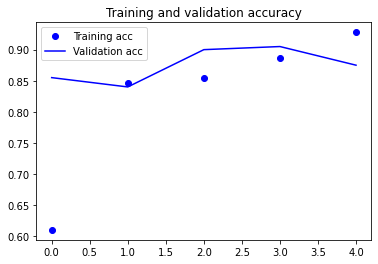

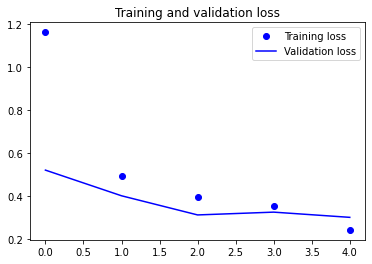

In [ ]:
# check out the learning curves!
# yes, you can shamelessly steal the code (make sure you know what it does!)

import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Evaluating the quality of your prediction
This is similar to binary classification - but we will need some argmax() and conversion to numpy arrays in order to retrive the proper labels!

How to predict with a generator:
* https://stackoverflow.com/questions/57874436/tensorflow-data-adapter-error-valueerror-failed-to-find-data-adapter-that-can

Note the shape of the output - we will need to simplify it!

In [ ]:
validation_generator.labels[0:5]

array([0, 0, 0, 0, 0], dtype=int32)

Generators are hard to work with! You need to extract both the label and prediction at once - otherwise order is comprimised.

This took a little bit of noodling to get right - needed to convert to numpy arrays along with the argmax() so that data was same format for appending. No need to flatten like we did in binary classification - for some reason it was coming out as a list with a space delimiter instead of commas... odd!

In [ ]:
# def flatten(l):
#     return [item for sublist in l for item in sublist]

In [ ]:
import pandas as pd
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  # don't forget the argmax!
  y_pred = np.array(y_pred.argmax(axis=1)) # need to convert to array!
  y_val = y_val.argmax(axis=1) # gets rid of dummy variables!
  #y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 1000 // 20:  # hard-coded the 1000 and 20 - you can improve it! it's the number of images and steps_per_epoch
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

In [ ]:
# here's what our dataframe looks like
my_results

,pred,actual
0,1,1
1,1,1
2,5,5
3,9,9
4,0,0
...,...,...
15,3,3
16,6,5
17,1,1
18,8,5


In [ ]:
my_results['actual'] = pd.to_numeric(my_results['actual'])
my_results['pred'] = pd.to_numeric(my_results['pred'])
my_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pred    1000 non-null   int64
 1   actual  1000 non-null   int64
dtypes: int64(2)
memory usage: 23.4 KB


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=my_results['pred']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       0.96      1.00      0.98       104
           2       0.95      0.92      0.94       105
           3       0.96      0.97      0.97       110
           4       0.95      0.88      0.91        80
           5       0.96      0.95      0.95        92
           6       0.91      0.96      0.93        82
           7       0.98      0.89      0.93       109
           8       0.88      0.90      0.89        93
           9       0.91      0.92      0.92       117

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(my_results['actual'], my_results['pred'])
matrix

array([[108,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,  97,   2,   0,   0,   0,   0,   3,   1],
       [  0,   0,   0, 107,   0,   2,   0,   0,   1,   0],
       [  0,   1,   1,   0,  70,   0,   2,   0,   2,   4],
       [  0,   0,   0,   0,   0,  87,   3,   0,   2,   0],
       [  0,   0,   0,   0,   1,   1,  79,   1,   0,   0],
       [  1,   1,   3,   1,   1,   0,   0,  97,   2,   3],
       [  1,   1,   1,   0,   0,   0,   3,   0,  84,   3],
       [  1,   1,   0,   1,   2,   1,   0,   1,   2, 108]])